<a href="https://colab.research.google.com/github/Storm00212/Data-manipulation-using-python/blob/main/Additional_skewness_and_kurtosis_on_grouped_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
classes = [(0,10), (10,20), (20,30), (30,40), (40,50)]
freqs = [5, 12, 20, 10, 3]
midpoints = np.array([(L+U)/2 for (L,U) in classes])
freqs = np.array(freqs)

In [3]:
N = freqs.sum()
mean = np.sum(freqs * midpoints) / N
deviations = midpoints - mean

In [5]:
# Central moments
mu2 = np.sum(freqs * deviations**2) / N
mu3 = np.sum(freqs * deviations**3) / N
mu4 = np.sum(freqs * deviations**4) / N

In [6]:
# Skewness and Kurtosis
skewness = mu3 / (mu2**1.5)
kurtosis_value = mu4 / (mu2**2)

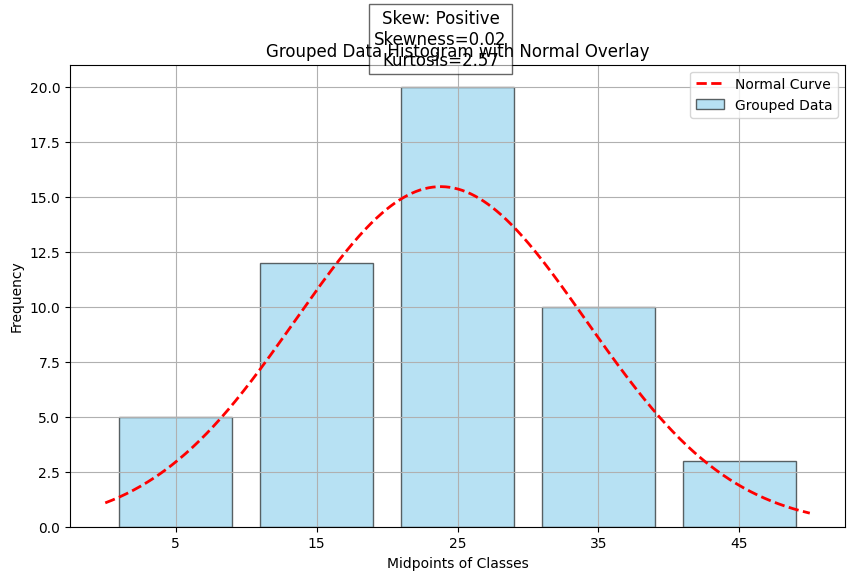

In [7]:
plt.figure(figsize=(10,6))

# Histogram of grouped data (bar plot)
plt.bar(midpoints, freqs, width=8, alpha=0.6, color='skyblue', edgecolor='black', label='Grouped Data')

# Overlay Normal Curve using same mean and variance
x = np.linspace(min(midpoints)-5, max(midpoints)+5, 500)
# Normal pdf scaled to match histogram height
pdf = norm.pdf(x, loc=mean, scale=np.sqrt(mu2)) * N * 8  # scale by N*width for visual match
plt.plot(x, pdf, 'r--', lw=2, label='Normal Curve')


# Annotate skewness automatically
skew_text = "Skew: Positive" if skewness > 0 else ("Skew: Negative" if skewness < 0 else "Skew: ~0 (Symmetric)")
plt.text(mean, max(freqs)+1, f"{skew_text}\nSkewness={skewness:.2f}\nKurtosis={kurtosis_value:.2f}",
         horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Labels
plt.xlabel("Midpoints of Classes")
plt.ylabel("Frequency")
plt.title("Grouped Data Histogram with Normal Overlay")
plt.xticks(midpoints)
plt.legend()
plt.grid(True)
plt.show()

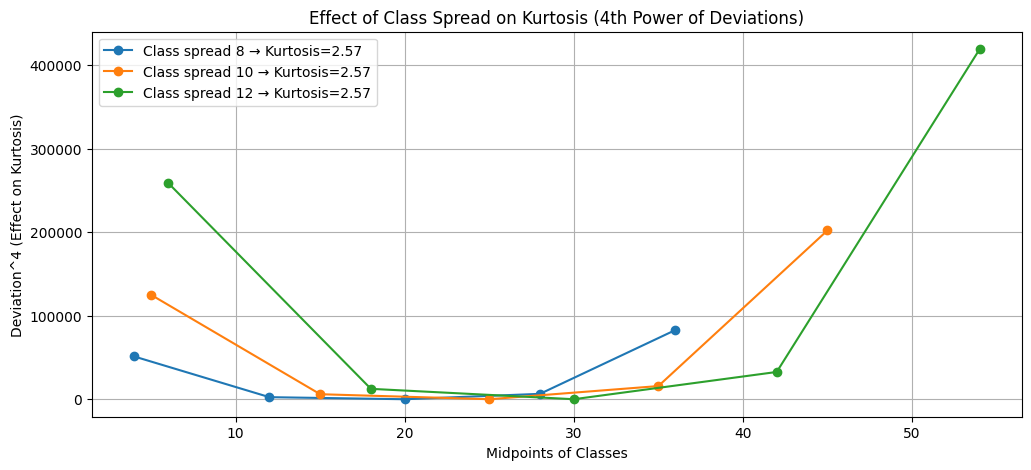

In [8]:

# Dynamically show kurtosis change
# Vary class spreads while keeping total frequency similar

plt.figure(figsize=(12,5))

# Three different spreads: narrow, original, wide
spreads = [
    [(0,8),(8,16),(16,24),(24,32),(32,40)],   # narrow classes
    [(0,10),(10,20),(20,30),(30,40),(40,50)], # original
    [(0,12),(12,24),(24,36),(36,48),(48,60)]  # wide classes
]

for cls in spreads:
    mid = np.array([(L+U)/2 for (L,U) in cls])
    # Using same frequencies for comparison
    dev = mid - np.sum(freqs*mid)/N
    mu2 = np.sum(freqs*dev**2)/N
    mu4 = np.sum(freqs*dev**4)/N
    kurt = mu4 / (mu2**2)
    plt.plot(mid, dev**4, 'o-', label=f'Class spread {cls[0][1]-cls[0][0]} → Kurtosis={kurt:.2f}')

plt.xlabel("Midpoints of Classes")
plt.ylabel("Deviation^4 (Effect on Kurtosis)")
plt.title("Effect of Class Spread on Kurtosis (4th Power of Deviations)")
plt.legend()
plt.grid(True)
plt.show()